In [190]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [177]:
"""
Read data csv, with colums structured as:

Q_w,Q_x,Q_y,Q_z,A_x,A_y,A_z,Areal_x,Areal_y,Areal_z,G_x,G_y,G_z,Gravity_x,Gravity_y,Gravity_z

"""

data = np.genfromtxt('mpu6050-data.csv', delimiter=',')

# convert accelerations to cm/s^2 and put in dictionary
data_dict = {'t':            data[:,0],
             'q':       {'w':data[:,1],
                         'x':data[:,2],
                         'y':data[:,3],
                         'z':data[:,4]},
             'aa':      {'x':data[:,6]/2**13*980.665,
                         'y':data[:,7]/2**13*980.665,
                         'z':data[:,8]/2**13*980.665},
             'aaReal':   {'x':data[:,8]/2**13*980.665,
                         'y':data[:,9]/2**13*980.665,
                         'z':data[:,10]/2**13*980.665},
             'gg':      {'x':data[:,11],
                         'y':data[:,12],
                         'z':data[:,13]},
             'gravity': {'x':data[:,14]*980.665,
                         'y':data[:,15]*980.665,
                         'z':data[:,16]*980.665}}

def plot_timeseries(data_dict, varname):
    plt.figure()
    plt.plot(data_dict['t'], data_dict[varname]['x'], '-k',  label=varname+'x')
    plt.plot(data_dict['t'], data_dict[varname]['y'], '--b', label=varname+'y')
    plt.plot(data_dict['t'], data_dict[varname]['z'], '-.r', label=varname+'z')
    plt.xlabel('time [s]')
    plt.ylabel(varname)
    plt.legend()
    return None

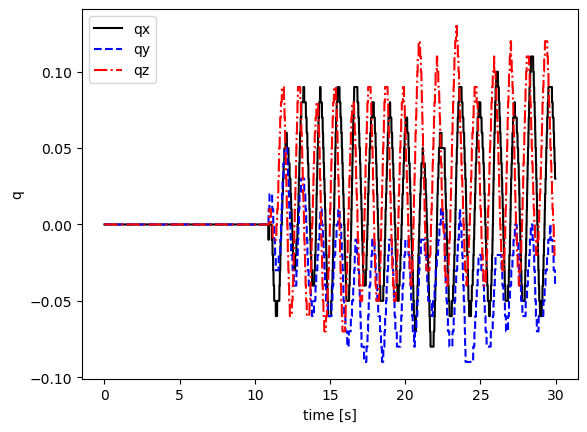

In [178]:
plot_timeseries(data_dict, 'q')

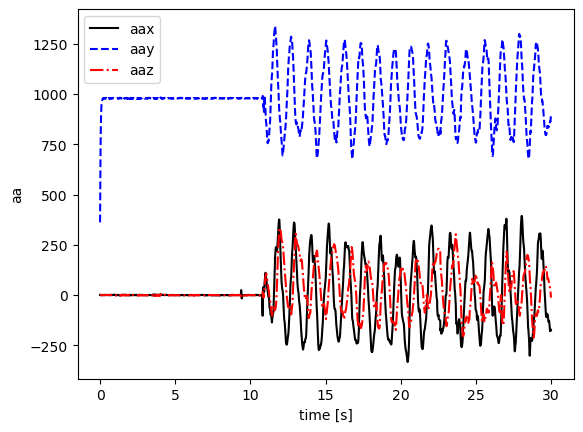

In [179]:
plot_timeseries(data_dict, 'aa')

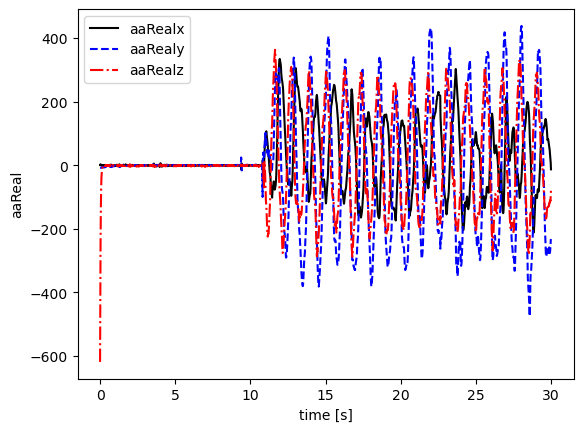

In [180]:
plot_timeseries(data_dict, 'aaReal')

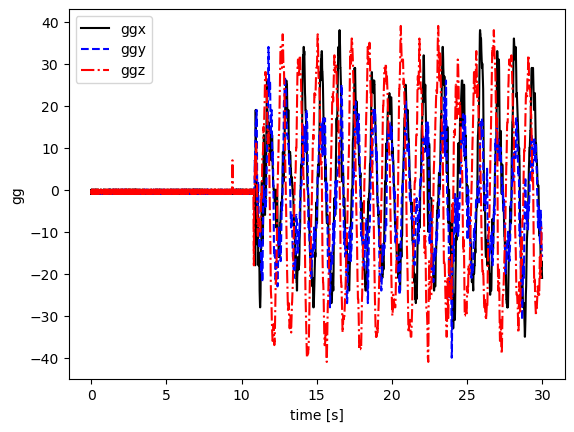

In [181]:
plot_timeseries(data_dict, 'gg')

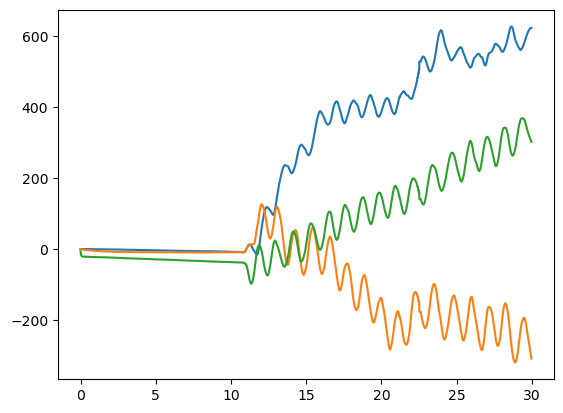

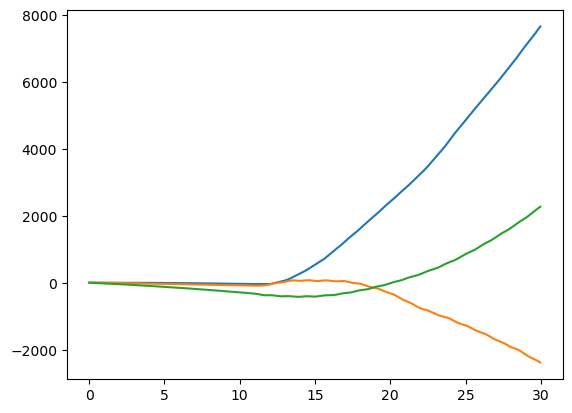

In [186]:
t  = data_dict['t']
ax = data_dict['aaReal']['x']
ay = data_dict['aaReal']['y']
az = data_dict['aaReal']['z']

vx = sp.integrate.cumtrapz(ax, x=t)
vy = sp.integrate.cumtrapz(ay, x=t)
vz = sp.integrate.cumtrapz(az, x=t)

dx = sp.integrate.cumtrapz(vx, x=t[:-1])
dy = sp.integrate.cumtrapz(vy, x=t[:-1])
dz = sp.integrate.cumtrapz(vz, x=t[:-1])

plt.figure()
plt.plot(t[:-1], vx)
plt.plot(t[:-1], vy)
plt.plot(t[:-1], vz)
plt.show()

plt.figure()
plt.plot(t[1:-1], dx)
plt.plot(t[1:-1], dy)
plt.plot(t[1:-1], dz)
plt.show()

In [195]:
tv = (t[1:]+t[:-1])/2
l1, l2  = 1500, 2000

R = sp.stats.linregress(tv[l1:l2], vx[l1:l2])

inter = -R[1]/R[0]
start = np.where(tv > inter)[0][0]

transformed = vx[start:] - (R[0]*t[start:] + R[1])
Vznew = np.concatenate((vx[:start], transformed))

ValueError: operands could not be broadcast together with shapes (2999,) (3000,) 